# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.
Questions For Investigation
As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

### 1. What is our independent variable? What is our dependent variable?

The independent variable of the Stroop task is the congruency of the pair of words listed to the person taking the stroop test. The dependent variable is the time taken by the subject to name the colours with which the words are written i.e. incongruent data.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

When attempting to test the relationship between the response times for the two conditions (congruent and incongruent), the following would be an appropriate set of of hypotheses:

The population mean for congruent and incongruent data are different. The mean for the incongruent set is greater than that of the congruent set.

An appropriate statistical test is required to determine the likelihood of each of these hypotheses is a dependent measure. 
T-test to determine different mean of population for both conditions are different and where standard deviation has to be calcualted. It makes sense to perform a dependent measures test as both conditions are performed by the entire population.

The accuracy of the dependent measures t-test is based on the assumption that the differences between the results for the two conditions for each of subjects is normally distributed. 

Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

In [2]:
import pandas as pd
stroop_df = pd.read_csv(r'''stroopdata.csv''')

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [3]:
print ("Number of results:")
#finding number of elements in the list
print (stroop_df.count())
print ("\n")
print ("median:")
#finding median
print (stroop_df.median())
print ("\n")
print (" mean:")
#finding
print (stroop_df.mean())
print ("\n")
#finding standard deviation
print ("standard deviation:")
print( stroop_df.std())


Number of results:
Congruent      24
Incongruent    24
dtype: int64


median:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


 mean:
Congruent      14.051125
Incongruent    22.015917
dtype: float64


standard deviation:
Congruent      3.559358
Incongruent    4.797057
dtype: float64


The fact that the standard deviation for the Incongruent Condition is larger than that of the Congruent Condition suggests that the Incongruent distribution is either wider or that there may be outliers present. A visual analysis of the dataset will provide a clearer understanding which of these may be the case.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

c:\users\aditya vikram\myenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


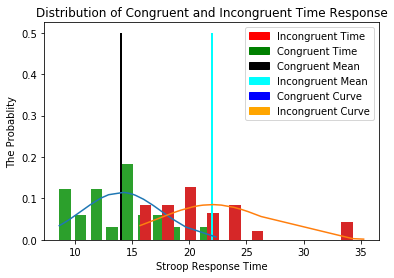

In [5]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.patches as mpatches



con_mean = stroop_df['Congruent'].mean()
incon_mean = stroop_df['Incongruent'].mean()
f1=sorted(stroop_df['Congruent'])
f2=sorted(stroop_df['Incongruent'])

e1=np.std(f1)
e2=np.std(f2)

fit1=norm.pdf(f1,con_mean,e1)
fit2=norm.pdf(f2,incon_mean,e2)

#to form a plot of the arranged normal distribution data
pl.plot(f1,fit1)
pl.plot(f2,fit2)

#to form a histogram of the arranged normal distribution data
pl.hist(f1,normed=True,width=1)      
pl.hist(f2,normed=True,width=1)      

#to form a bar of the arranged normal distribution data
pl.bar(con_mean,0.5,width=0.2,color='black')#use this to draw bar of your data
pl.bar(incon_mean,0.5,width=0.2,color='cyan')#use this to draw bar of your data

pl.xlabel('Stroop Response Time')
pl.ylabel('The Probablity')

pl.title('Distribution of Congruent and Incongruent Time Response')

red_patch = mpatches.Patch(color='red', label='Incongruent Time')
green_patch=mpatches.Patch(color='green',label='Congruent Time')
black_patch=mpatches.Patch(color='black',label='Congruent Mean')
cyan_patch=mpatches.Patch(color='cyan',label='Incongruent Mean')
blue_patch=mpatches.Patch(color='blue',label='Congruent Curve')
orange_patch=mpatches.Patch(color='orange',label='Incongruent Curve')

plt.legend(handles=[red_patch,green_patch,black_patch,cyan_patch,blue_patch,orange_patch])

pl.show()    



The distribution plot above shows the Incongruent Condition exhibit higher response times than those for Congruent Condition. However both distributions do overlap which means that for both distributions there is a range where the Kernel Density Estimates overlap.

The Kernel Density Estimate for the Incongruent Condition has a second peak suggesting outliers but the possible values above 30 seconds(with peak around 25) are not that far off from peak and hence will be ignored.

In [ ]:
Visualisations

14.3565 21.0175


c:\users\aditya vikram\myenv\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


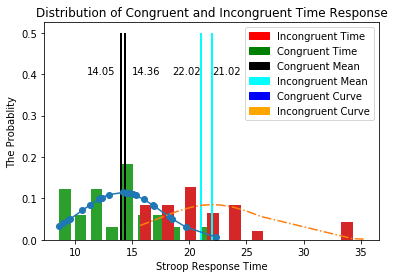

In [6]:
f1=sorted(stroop_df['Congruent'])
f2=sorted(stroop_df['Incongruent'])

outliers= stroop_df['Incongruent'] >0 
stroop_df1= stroop_df[outliers== False]           #Removing outliers as they don't affect the result too much

m1,m2=stroop_df.median()
g1,g2=stroop_df.mode()

e1=np.std(f1)
e2=np.std(f2)

print(m1 ,m2)
fit1=norm.pdf(f1,con_mean,e1)
fit2=norm.pdf(f2,incon_mean,e2)

#to form a plot of the arranged normal distribution data
pl.plot(f1,fit1,'-o')
pl.plot(f2,fit2,'-.')

#to form a histogram of the arranged normal distribution data
pl.hist(f1,normed=True,width=1)      
pl.hist(f2,normed=True,width=1)      

#to form a bar of the arranged normal distribution data
pl.bar(con_mean,0.5,width=0.2,color='black')#use this to draw bar of your data
pl.bar(incon_mean,0.5,width=0.2,color='cyan')#use this to draw bar of your data
pl.bar(m1,0.5,width=0.2,color='black')#use this to draw bar of your data
pl.bar(m2,0.5,width=0.2,color='cyan')#use this to draw bar of your data

pl.xlabel('Stroop Response Time')
pl.ylabel('The Probablity')
plt.text(11,0.4,str(round(con_mean,2)))
plt.text(18.5,0.4,str(round(incon_mean,2)))
plt.text(15,0.4,str(round(m1,2)))
plt.text(22,0.4,str(round(m2,2)))

pl.title('Distribution of Congruent and Incongruent Time Response')

green_patch=mpatches.Patch(color='green',label='Congruent Time')
red_patch = mpatches.Patch(color='red', label='Incongruent Time')
black_patch=mpatches.Patch(color='black',label='Congruent Mean')
cyan_patch=mpatches.Patch(color='cyan',label='Incongruent Mean')
blue_patch=mpatches.Patch(color='blue',label='Congruent Curve')
orange_patch=mpatches.Patch(color='orange',label='Incongruent Curve')

plt.legend(handles=[red_patch,green_patch,black_patch,cyan_patch,blue_patch,orange_patch])

pl.show()    




The distrubution of congruent and incongruent time response has its mean value as 14.05 and 22.02,its median value as 14.36 and 21.02 repectively.By removing the paired results for Congruency and the outliers for Incongruency the output produced is narrower and slightly closer distributions but overall there is no difference and hence removal of outliers did not affect the distribution.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [10]:

import math
from scipy.stats import t

def ttest(dat1, dat2, alpha, critical_t):
    mean1 = dat1.mean()
    mean2 = dat2.mean()
    
    #dom = difference of means

    dom=mean1 - mean2    
    
    # dtr = difference between results
    
    dtr =dat1 - dat2     

    sample_size = len(dat1)
    df = sample_size - 1

    #sdd- std of differences
    
    sdd= dtr.std()  

    stat = dom/ (sdd/math.sqrt(sample_size))
    p_value = t.pdf(stat, df)
    
    reject_the_null = p_value < alpha

    
    cohens_d =dom/sdd
    
    print ("We accept the alternative hypothesis=" + str(reject_the_null))
    print ("The p value for a t statistic of " + str(abs(stat)) + " with a df of " + str(df) + ": " + str(p_value))
    print ("Cohen's D test is: " + str(cohens_d))
    
    ci_lower_boundary = dom- t_critical * (sdd/math.sqrt(sample_size))
    ci_upper_boundary = dom+ t_critical * (sdd/math.sqrt(sample_size))
                                                            
    print ("The confidence interval for a t-critical value of " + str(t_critical) + " is: " +
            "(" + str(ci_lower_boundary) + ", " + str(ci_upper_boundary) + ")")

In [ ]:
Dependent Measure T-test

In [11]:
# T value lifted off the internet t tables
t_critical = 2.080
ttest(stroop_df['Congruent'], stroop_df['Incongruent'], 0.025, t_critical)

We accept the alternative hypothesis=True
The p value for a t statistic of 8.020706944109957 with a df of 23: 4.393995815913909e-08
Cohen's D test is: -1.6372199491222625
The confidence interval for a t-critical value of 2.08 is: (-10.030291227005616, -5.899292106327718)



The comparison between dependent and the independent variable affirms that the time taken by the incongruent data is more which matches my expectation.


Main Sources: Github , Stackoverflow

Other Sources:

1) Pylab :https://scipy.github.io/old-wiki/pages/PyLab

2) Student's t-test https://en.wikipedia.org/w/index.php?title=Student%27s_t-test&oldid=709322415

3) SciPy : https://docs.scipy.org/doc/scipy/reference/index.html

4) Distribution: http://www.statisticshowto.com/tables/t-distribution-table/#two

5) Adding Bar Chart: https://stackoverflow.com/questions/40287847/python-matplotlib-bar-chart-adding-bar-

6) Text inplot: https://matplotlib.org/users/text_intro.html
